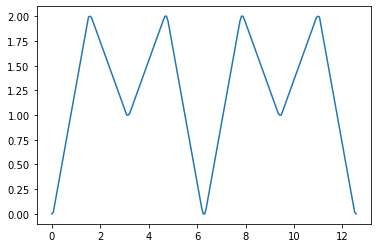

In [1]:
from jax_circuits import *
from cp_utils import *
from topology import *
from scipy.stats import unitary_group

import matplotlib.pyplot as plt

u_target = unitary_group.rvs(4, random_state=0)
d = Decompose(sequ_layer(2), u_target=u_target)
sweep = jnp.linspace(0, 4*jnp.pi, 200)
plt.plot(sweep, vmap(d.cp_regularization_func)(sweep))

# Chain Toffoli 3 with 7 gates up to a swap

In [85]:
u_target = u_toff3
layer = chain_layer(3)
unitary_loss_func = lambda u: disc2_swap(u, u_target, 3)

decomposer = Decompose(layer, unitary_loss_func=unitary_loss_func)

static_options = {'batch_size': 100, 'accepted_num_gates': 8}

adaptive_options = {'max_evals':20,
                   'max_num_cp_gates':12,
                   'min_num_cp_gates':6,
                   'target_num_gates': 7,
                   'evals_between_verification':2,
                   'stop_if_target_reached': False}


results = decomposer.adaptive(
    static_options=static_options,
    adaptive_options = adaptive_options,
    save_to = 'data/toff3_chain_swap/',
    overwrite_existing_trials=False,
    overwrite_existing_decompositions=False,
)


Starting decomposition routine with the following options:

Static:
{'accepted_num_gates': 8,
 'batch_size': 100,
 'cp_dist': 'uniform',
 'entry_loss': 0.001,
 'learning_rate': 0.01,
 'method': 'adam',
 'num_gd_iterations': 2000,
 'target_loss': 1e-06,
 'threshold_cp': 0.2}

Adaptive:
{'evals_between_verification': 2,
 'hyperopt_random_seed': 0,
 'max_evals': 20,
 'max_num_cp_gates': 12,
 'min_num_cp_gates': 6,
 'r_mean': 0.00055,
 'r_variance': 0.5,
 'stop_if_target_reached': False,
 'target_num_gates': 7}




Epochs:   0%|                                                                                                                      | 0/10 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [01:08<00:00, 34.29s/trial, best loss: -0.048124998807907104]

Found 36 decompositions potentially better than current best count 14, verifying...


Epochs:  10%|███████████                                                                                                   | 1/10 [01:25<12:49, 85.49s/it]


Found new decomposition with 8 gates.


100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [01:02<00:00, 31.06s/trial, best loss: -0.054375000298023224]

Epochs:  20%|██████████████████████                                                                                        | 2/10 [02:27<09:34, 71.75s/it]



Found no better decompositions. Found 4 decompositions with the current best count 8.

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:59<00:00, 29.96s/trial, best loss: -0.08453124761581421]

Found 5 decompositions potentially better than current best count 8, verifying...


Epochs:  30%|█████████████████████████████████                                                                             | 3/10 [03:42<08:32, 73.16s/it]


Found new decomposition with 7 gates.


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [01:04<00:00, 32.38s/trial, best loss: -0.08453124761581421]

Epochs:  40%|████████████████████████████████████████████                                                                  | 4/10 [04:47<06:59, 69.85s/it]



Found no better decompositions. Found 1 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [00:56<00:00, 28.47s/trial, best loss: -0.08453124761581421]

Epochs:  50%|███████████████████████████████████████████████████████                                                       | 5/10 [05:44<05:26, 65.20s/it]



Found no better decompositions. Found 3 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 12/12 [00:56<00:00, 28.11s/trial, best loss: -0.08453124761581421]

Epochs:  60%|██████████████████████████████████████████████████████████████████                                            | 6/10 [06:40<04:08, 62.16s/it]



Found no better decompositions. Found 0 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [01:03<00:00, 31.77s/trial, best loss: -0.09289062768220901]

Epochs:  70%|█████████████████████████████████████████████████████████████████████████████                                 | 7/10 [07:43<03:07, 62.61s/it]



Found no better decompositions. Found 4 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 16/16 [01:01<00:00, 30.71s/trial, best loss: -0.09289062768220901]

Epochs:  80%|████████████████████████████████████████████████████████████████████████████████████████                      | 8/10 [08:45<02:04, 62.24s/it]



Found no better decompositions. Found 0 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [01:04<00:00, 32.22s/trial, best loss: -0.09289062768220901]

Epochs:  90%|███████████████████████████████████████████████████████████████████████████████████████████████████           | 9/10 [09:49<01:02, 62.93s/it]



Found no better decompositions. Found 2 decompositions with the current best count 7.

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [01:09<00:00, 34.95s/trial, best loss: -0.09289062768220901]

Epochs: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [10:59<00:00, 65.98s/it]



Found no better decompositions. Found 3 decompositions with the current best count 7.


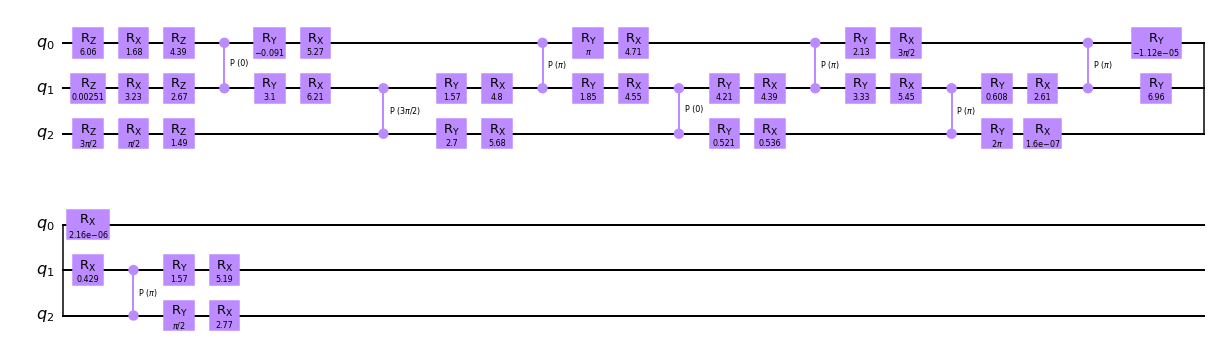

In [98]:
trials, decompositions = Decompose.load_trials_and_decompositions('data/toff3_chain_swap/')
cz, circ, u, angs = decompositions[-1]
disc2(u(angs), permutation_matrices(3)[1]@u_toff3)
circ(angs).draw(output='mpl')